In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("quejasambientalescundi.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30885 entries, 0 to 30884
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ITEM                          30885 non-null  int64 
 1   FECHA RADICACIÓN              30885 non-null  object
 2   AÑO                           30885 non-null  int64 
 3   MES                           30885 non-null  int64 
 4   TIPO PETICIÓN                 30885 non-null  object
 5   CANAL                         30885 non-null  object
 6   USUARIO                       30885 non-null  object
 7   FECHA VENCIMIENTO             30885 non-null  object
 8   TIPO RESPUESTA                30885 non-null  object
 9   FECHA RESPUESTA FINAL         30885 non-null  object
 10  DEPENDENCIA PRINCIPAL         30885 non-null  object
 11  COLOR ESTADO                  30885 non-null  object
 12  ESTADO RESPUESTA              30885 non-null  obje


Valores faltantes por columna:
ITEM                            0
FECHA RADICACIÓN                0
AÑO                             0
MES                             0
TIPO PETICIÓN                   0
CANAL                           0
USUARIO                         0
FECHA VENCIMIENTO               0
TIPO RESPUESTA                  0
FECHA RESPUESTA FINAL           0
DEPENDENCIA PRINCIPAL           0
COLOR ESTADO                    0
ESTADO RESPUESTA                0
MUNICIPIO                       0
VEREDA                          0
FINALIZÓ EN:                    0
VISITA                          0
VISITA EXISTENCIA AFECTACION    0
SUELO                           0
FLORA                           0
FAUNA                           0
AIRE                            0
AGUA                            0
SERIE                           0
SUBSERIE                        0
ESTADO ACTUAL                   0
TIPO PERSONA                    0
ATENCIÓN PREFERENCIAL           1
RIESGO SALUD U O

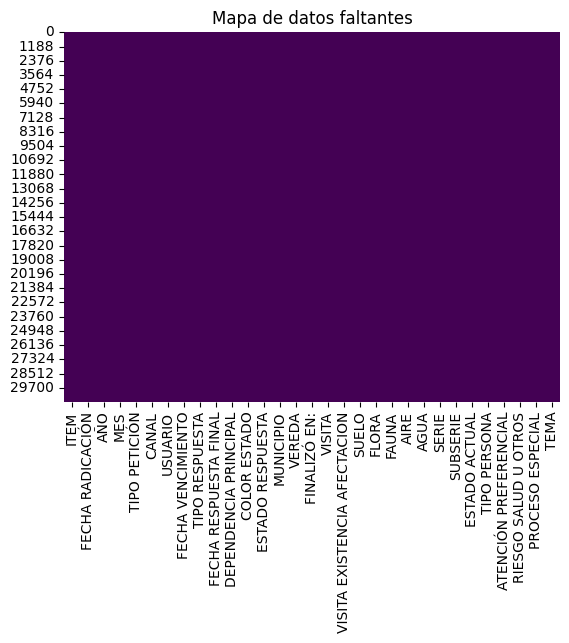

In [13]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

In [14]:
df_seleccion = df[['AÑO', 'MES', 'ITEM', 'TIPO PETICIÓN', 'MUNICIPIO', 'ESTADO RESPUESTA']]
display(df_seleccion.head())

,AÑO,MES,ITEM,TIPO PETICIÓN,MUNICIPIO,ESTADO RESPUESTA
0,2009,1,1,D.P. Queja Ambiental (Afectación Ambiental),Sin datos,Respuesta Fuera de Terminos
1,2009,1,2,D.P. Queja Ambiental (Afectación Ambiental),Fusagasugá,Respuesta en Terminos
2,2009,1,3,D.P. Queja Ambiental (Afectación Ambiental),Fusagasugá,Respuesta en Terminos
3,2009,1,4,D.P. Queja Ambiental (Afectación Ambiental),Fusagasugá,Respuesta Fuera de Terminos
4,2009,1,5,D.P. Queja Ambiental (Afectación Ambiental),Fusagasugá,Respuesta en Terminos


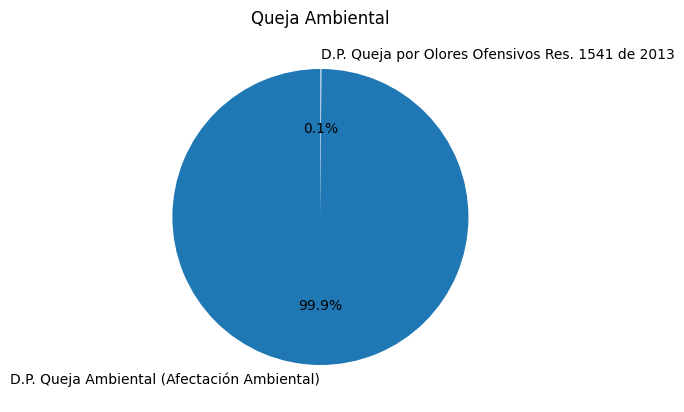

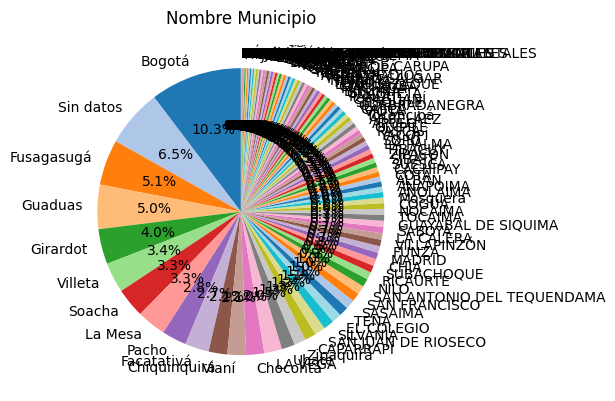

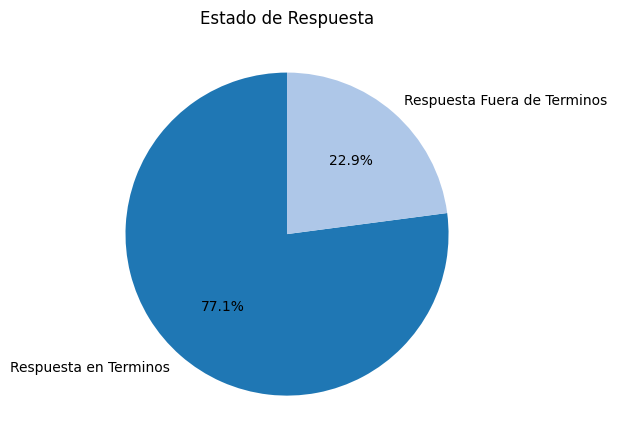

In [18]:
import matplotlib.pyplot as plt

# Lista de variables categóricas y títulos para los gráficos
categorical_vars = [
    ('TIPO PETICIÓN', 'Queja Ambiental'),
    ('MUNICIPIO', 'Nombre Municipio'),
    ('ESTADO RESPUESTA', 'Estado de Respuesta'),

]

for var, title in categorical_vars:
    plt.figure(figsize=(6, 6))
    df[var].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(title)
    plt.ylabel('')  # Eliminar la etiqueta del eje y
    plt.tight_layout()
    plt.show()

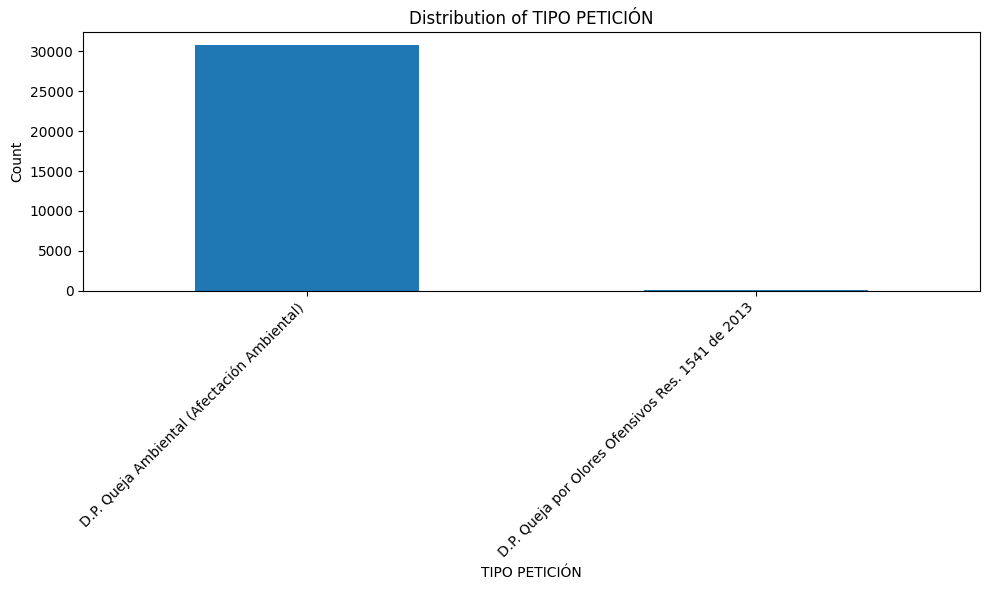

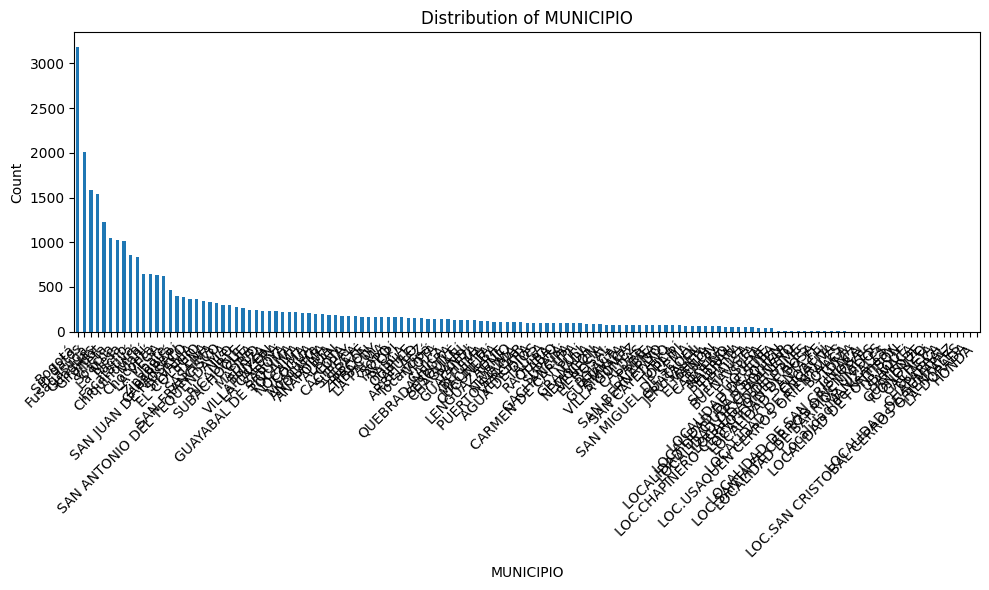

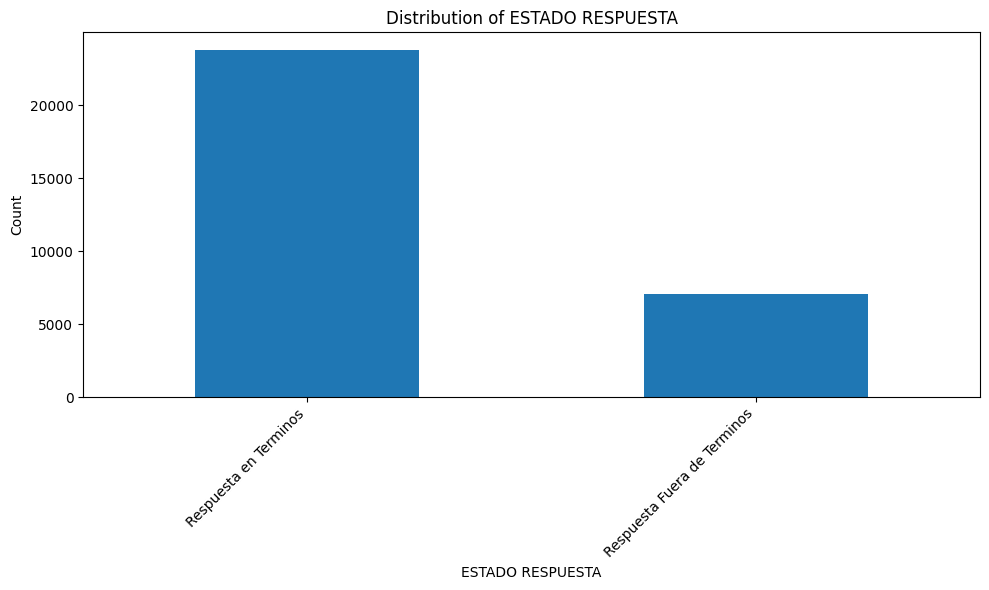

In [22]:
# Generate bar plots for categorical variables
categorical_cols = ['TIPO PETICIÓN', 'MUNICIPIO', 'ESTADO RESPUESTA']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

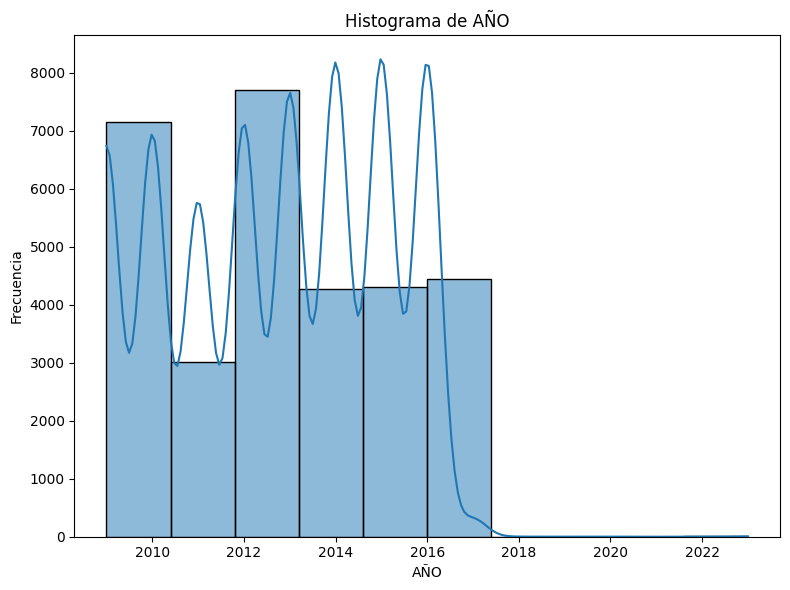

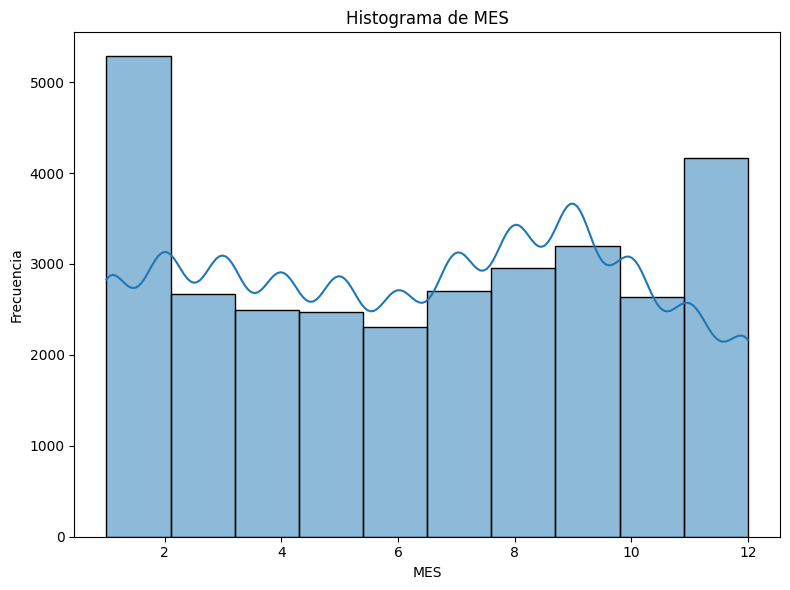

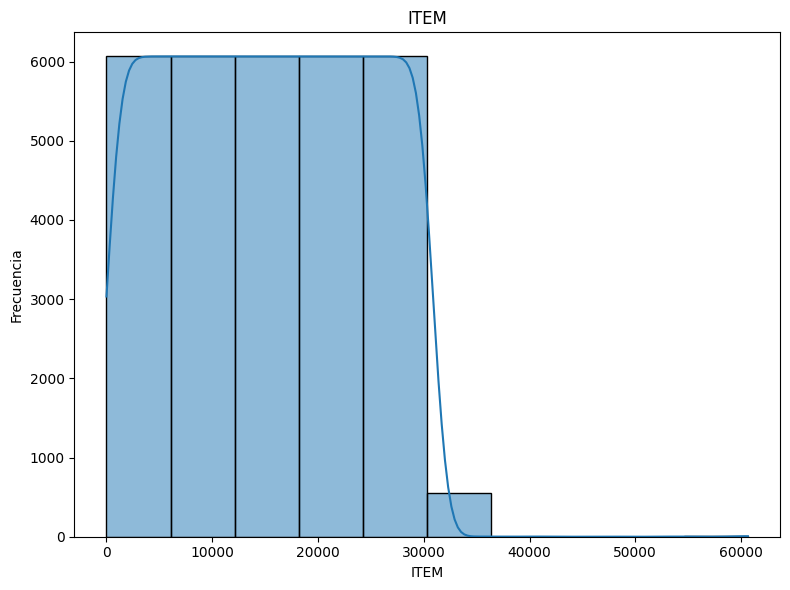

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para AÑO
plt.figure(figsize=(8, 6))
sns.histplot(df['AÑO'], bins=10, edgecolor='black', kde=True)
plt.xlabel('AÑO')
plt.ylabel('Frecuencia')
plt.title('Histograma de AÑO')
plt.tight_layout()
plt.show()

# Histograma para MES
plt.figure(figsize=(8, 6))
sns.histplot(df['MES'], bins=10, edgecolor='black', kde=True)
plt.xlabel('MES')
plt.ylabel('Frecuencia')
plt.title('Histograma de MES')
plt.tight_layout()
plt.show()

# Histograma para ITEM
plt.figure(figsize=(8, 6))
sns.histplot(df['ITEM'], bins=10, edgecolor='black', kde=True)
plt.xlabel('ITEM')
plt.ylabel('Frecuencia')
plt.title('ITEM')
plt.tight_layout()
plt.show()

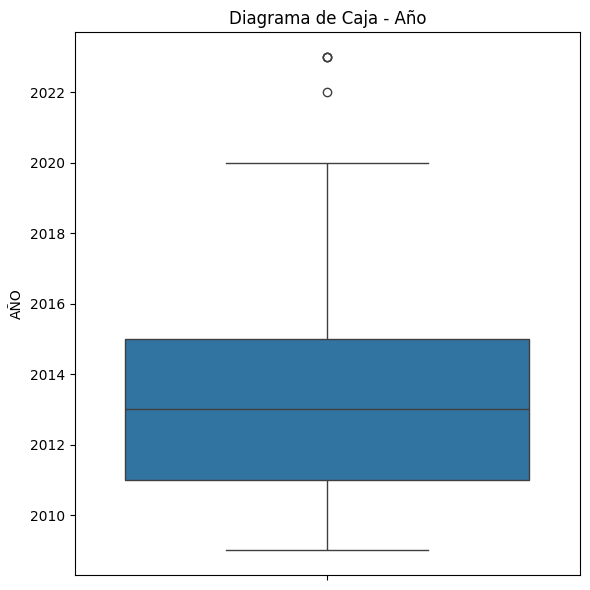

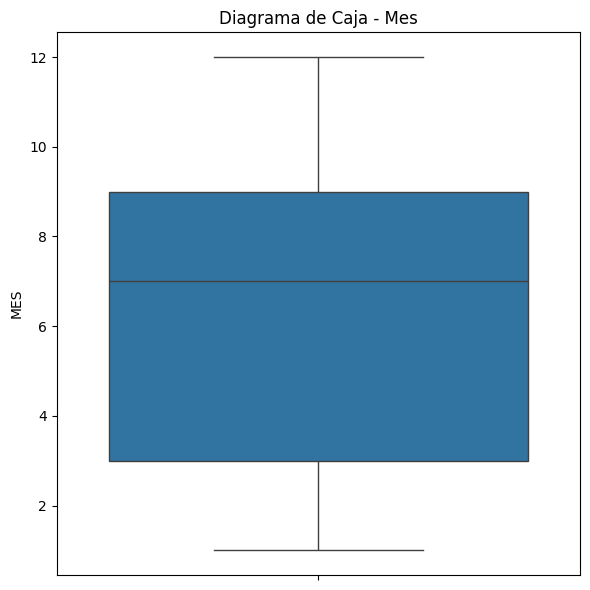

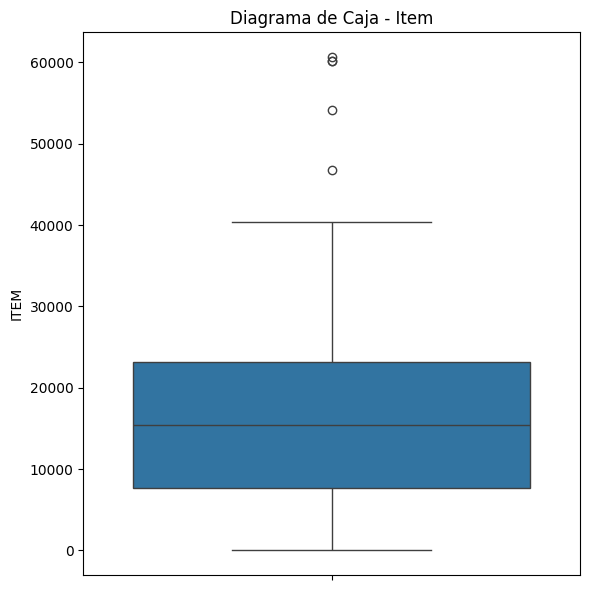

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagrama de caja para Año
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['AÑO'])
plt.title('Diagrama de Caja - Año')
plt.tight_layout()
plt.show()

# Diagrama de caja para Mes
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['MES'])
plt.title('Diagrama de Caja - Mes')
plt.tight_layout()
plt.show()

# Diagrama de caja para Item
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['ITEM'])
plt.title('Diagrama de Caja - Item')
plt.tight_layout()
plt.show()

In [32]:
# Calcular Q1, Q3 e IQR para ambas variables en un solo paso
Q1 = df[['AÑO', 'ITEM']].quantile(0.25)
Q3 = df[['AÑO', 'ITEM']].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un dato como atípico
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers en ambas variables
condicion = (
    (df['AÑO'] >= limite_inferior['AÑO']) & (df['AÑO'] <= limite_superior['AÑO']) &
    (df['ITEM'] >= limite_inferior['ITEM']) & (df['ITEM'] <= limite_superior['ITEM'])
)
df_sinatipicos = df[condicion]

# Mostrar la cantidad de datos restantes
print(f"Número de datos restantes después de eliminar outliers: {len(df_sinatipicos)}")

Número de datos restantes después de eliminar outliers: 30880


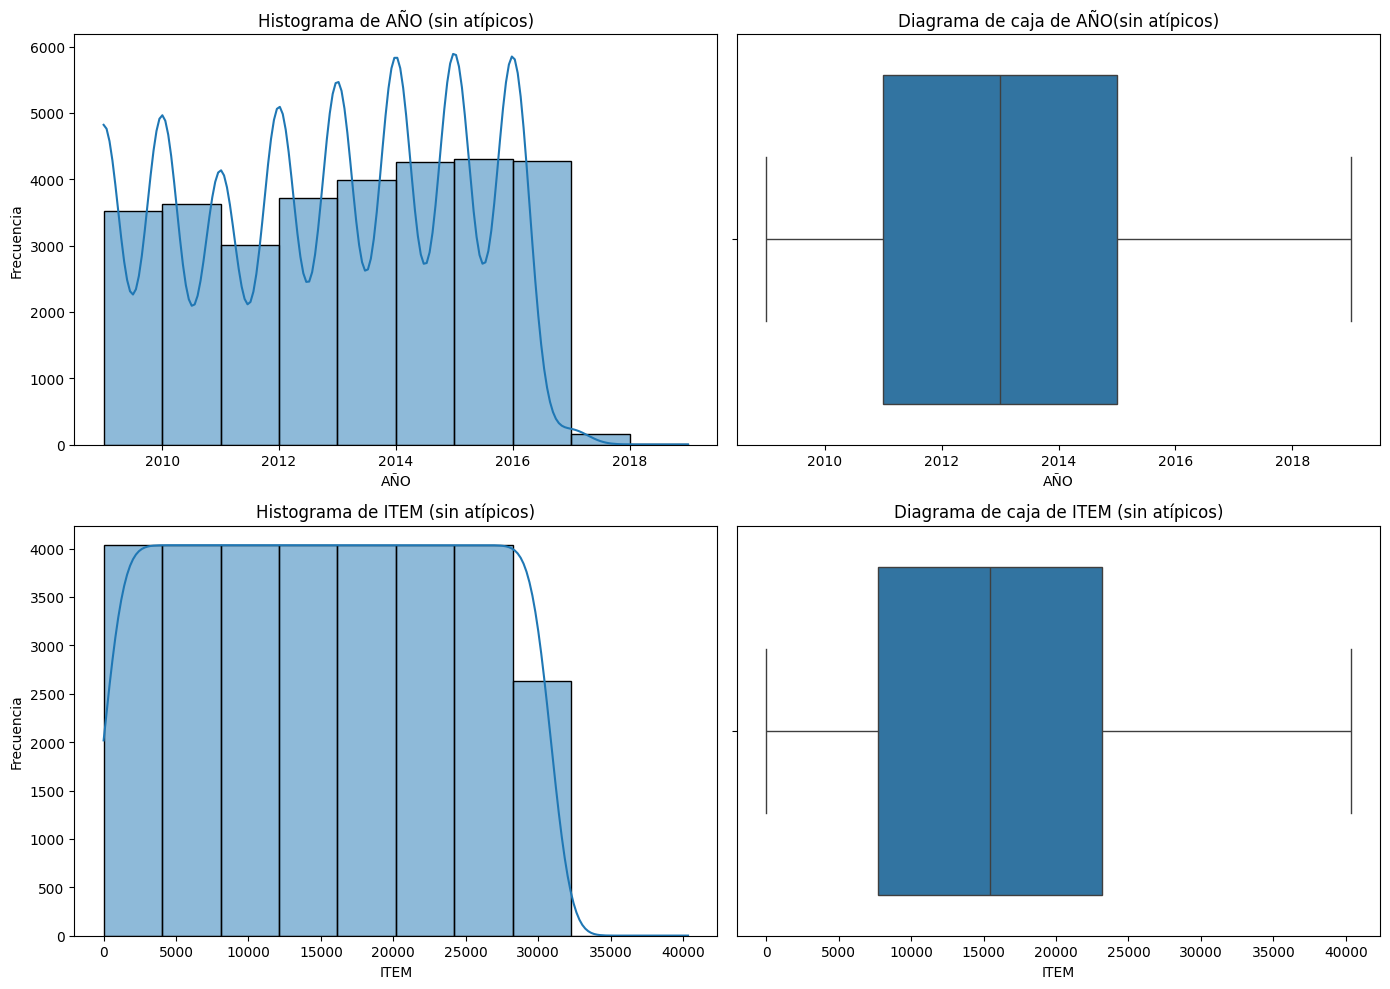

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma y boxplot para AÑO
sns.histplot(df_sinatipicos['AÑO'], bins=10, edgecolor='black', kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('AÑO')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Histograma de AÑO (sin atípicos)')

sns.boxplot(x=df_sinatipicos['AÑO'], ax=axes[0, 1])
axes[0, 1].set_xlabel('AÑO')
axes[0, 1].set_title('Diagrama de caja de AÑO(sin atípicos)')

# Histograma y boxplot para ITEM
sns.histplot(df_sinatipicos['ITEM'], bins=10, edgecolor='black', kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('ITEM')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Histograma de ITEM (sin atípicos)')

sns.boxplot(x=df_sinatipicos['ITEM'], ax=axes[1, 1])
axes[1, 1].set_xlabel('ITEM')
axes[1, 1].set_title('Diagrama de caja de ITEM (sin atípicos)')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30885.
  res = hypotest_fun_out(*samples, **kwds)


Resultados de los tests de normalidad (valores p):

Variable: AÑO
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 655.5110, Crítico (5%): 0.7870
  Jarque-Bera p = 0.0000
  → NO es distribución normal (según mayoría de tests)

Variable: ITEM
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 339.2682, Crítico (5%): 0.7870
  Jarque-Bera p = 0.0000
  → NO es distribución normal (según mayoría de tests)



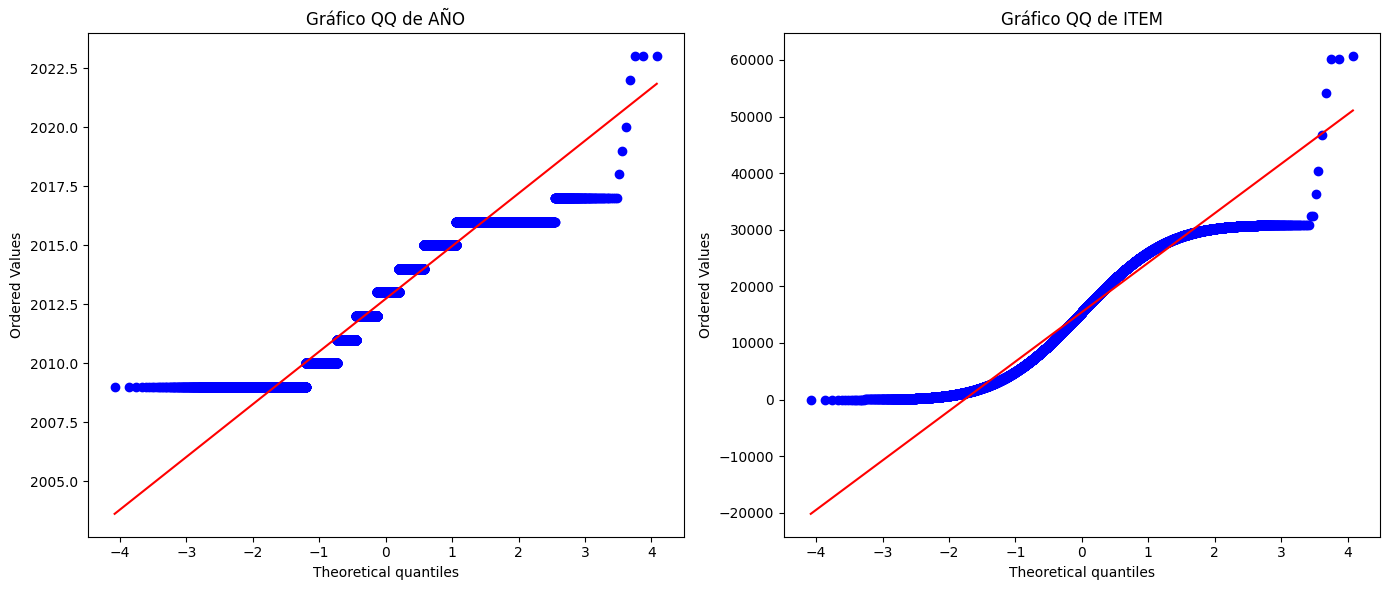

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot

# Lista de variables a evaluar
columnas_fisicas = ['AÑO', 'ITEM']

# Diccionario para almacenar resultados
resultados_normalidad = {}

# Evaluar cada variable
for col in columnas_fisicas:
    if col in df.columns:
        datos = df[col].dropna()
        # Shapiro-Wilk
        stat_sw, p_sw = shapiro(datos)
        # Kolmogorov-Smirnov
        media, desv = np.mean(datos), np.std(datos)
        stat_ks, p_ks = kstest(datos, "norm", args=(media, desv))
        # Anderson-Darling
        resultado_ad = anderson(datos)
        stat_ad = resultado_ad.statistic
        crit_ad = resultado_ad.critical_values[2]  # 5%
        ad_normal = stat_ad < crit_ad
        # Jarque-Bera
        stat_jb, p_jb = jarque_bera(datos)
        # Guardar resultados
        resultados_normalidad[col] = {
            'Shapiro-Wilk': p_sw,
            'Kolmogorov-Smirnov': p_ks,
            'Anderson-Darling': f'Estadístico: {stat_ad:.4f}, Crítico (5%): {crit_ad:.4f}',
            'Jarque-Bera': p_jb,
            'Normal': sum([
                p_sw > 0.05,
                p_ks > 0.05,
                ad_normal,
                p_jb > 0.05
            ]) >= 3
        }

# Mostrar resultados en tabla
print("Resultados de los tests de normalidad (valores p):\n")
for var, res in resultados_normalidad.items():
    print(f"Variable: {var}")
    print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk']:.4f}")
    print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov']:.4f}")
    print(f"  Anderson-Darling {res['Anderson-Darling']}")
    print(f"  Jarque-Bera p = {res['Jarque-Bera']:.4f}")
    if res['Normal']:
        print("  → Distribución normal (según mayoría de tests)\n")
    else:
        print("  → NO es distribución normal (según mayoría de tests)\n")

# Gráficos QQ para cada variable
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, col in enumerate(columnas_fisicas):
    if col in df.columns:
        probplot(df[col].dropna(), dist="norm", plot=axes[i])
        axes[i].set_title(f"Gráfico QQ de {col}")
plt.tight_layout()
plt.show()